## Sentiment Analysis

In [1]:
import pandas as pd  # Importing the pandas library for data analysis and manipulation
import numpy as np  # Importing the numpy library for numerical computations
import matplotlib.pyplot as plt  # Importing the matplotlib library for data visualization
import seaborn as sns  # Importing the seaborn library for statistical visualization
plt.style.use('ggplot')  # Setting the plotting style to 'ggplot' for consistent visualizations
import nltk  # Importing the nltk library for natural language processing tasks

In [2]:
# Read in data
df = pd.read_csv('reviews.csv')  # Read the CSV file and create a DataFrame called df
print(df.shape)  # Print the shape (number of rows and columns) of df

# Create a new DataFrame with the first 500 rows of df
New_df = df.head(500)
print(New_df.shape)  # Print the shape of New_df

(568454, 10)
(500, 10)


In [3]:
New_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
New_df.columns  # Checking the columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Quick EDA

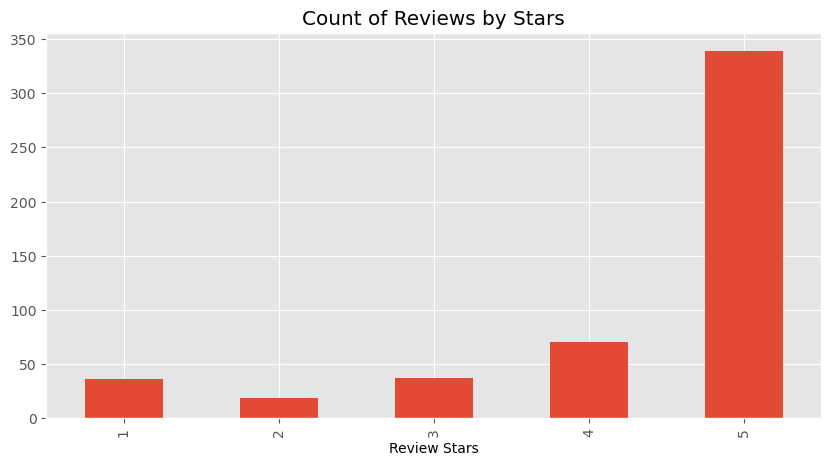

In [5]:
# Count the occurrences of each score and sort them by index
ax = New_df['Score'].value_counts().sort_index() \
    .plot(kind='bar',  # Plot a bar chart
          title='Count of Reviews by Stars',  # Set the title of the chart
          figsize=(10, 5))  # Set the size of the chart

ax.set_xlabel('Review Stars')  # Set the label for the x-axis
plt.show()  # Display the plot

### Basic NLTK

In [6]:
# performing one example 
example = New_df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
import nltk  # Importing the nltk library 

In [8]:
nltk.download('punkt')   # Download the 'punkt' resource

[nltk_data] Downloading package punkt to C:\Users\Sahil
[nltk_data]     Shigwan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Tokenize the text
tokens = nltk.word_tokenize(example)

# Printing the first 10 tokens
print(tokens[:10])

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [10]:
nltk.download('averaged_perceptron_tagger') # # Download the 'averaged_perceptron_tagger' model

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sahil Shigwan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
# Performing part-of-speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [12]:
nltk.download('maxent_ne_chunker') # Download the maxent_ne_chunker resource

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Sahil
[nltk_data]     Shigwan\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [13]:
nltk.download('words')  # Download the words resource

[nltk_data] Downloading package words to C:\Users\Sahil
[nltk_data]     Shigwan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
# Perform chunking
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


### VADER Seniment Scoring
- We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
- This uses a "bag of words" approach:
  1. Stop words are removed 
  2. each word is scored and combined to a total score.

In [15]:
# This code is downloading the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon from NLTK. 
# VADER is a pre-trained sentiment analysis tool specifically designed for analyzing sentiment in social media text.

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Sahil
[nltk_data]     Shigwan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
# Importing necessary modules
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Initializing SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

#### Performing some examples with the model

In [17]:
sia.polarity_scores('I am so happy!')   # Example 1

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [18]:
sia.polarity_scores('This is the worst thing ever.')  # Example 2

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [19]:
sia.polarity_scores(example)  #  running the polarity scores for the 'example' text

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(New_df.iterrows(), total=len(New_df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [21]:
# Creating a DataFrame 'vaders' with the sentiment analysis results 'res'
vaders = pd.DataFrame(res).T

# Resetting the index of 'vaders' DataFrame and renaming the column to 'Id'
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Merging 'vaders' DataFrame with another DataFrame 'df' using a left join
vaders = vaders.merge(df, how='left')

In [22]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plot VADER results

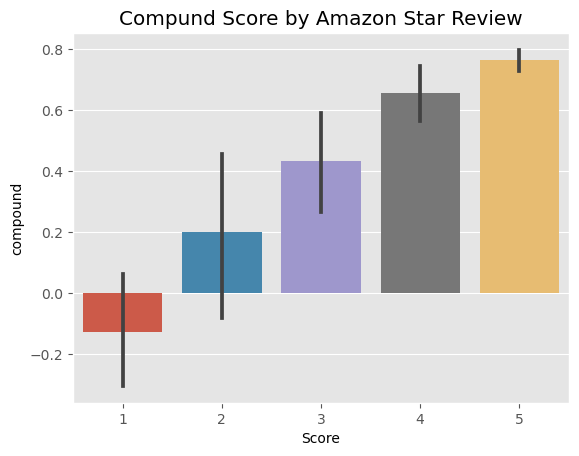

In [23]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

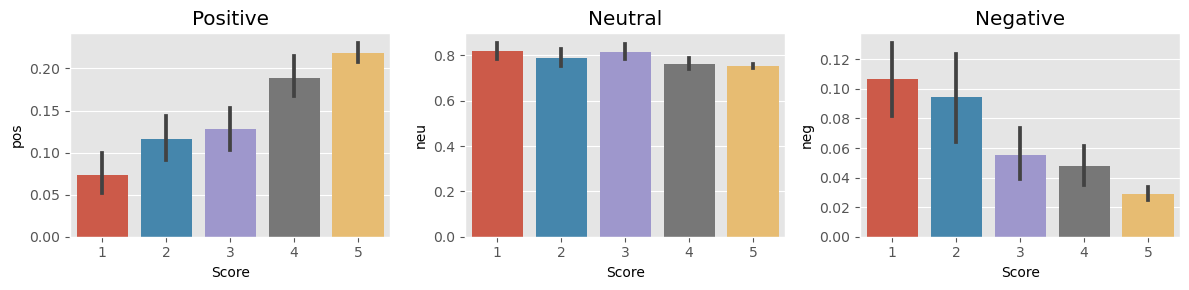

In [24]:
# Plotting Positive, Negative, Neutral bar plots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Roberta Pretrained Model
- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words

In [25]:
# Importing necessary modules
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
# Defining the pre-trained model to be used
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Initializing the tokenizer using the specified pre-trained model
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Initializing the model for sequence classification using the specified pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [27]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [28]:
# Encoding the example text using the tokenizer
encoded_text = tokenizer(example, return_tensors='pt')

# Passing the encoded text as input to the model and obtaining the output
output = model(**encoded_text)

# Detaching the output tensor and converting it to a numpy array
scores = output[0][0].detach().numpy()

# Applying the softmax function to the scores array
scores = softmax(scores)

# Creating a dictionary to store the scores for each sentiment category
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

# Printing the scores dictionary
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687481, 'roberta_pos': 0.0029573753}


In [29]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [30]:
res = {}
for i, row in tqdm(New_df.iterrows(), total=len(New_df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

### Compare Scores between models

In [32]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Combine and compare

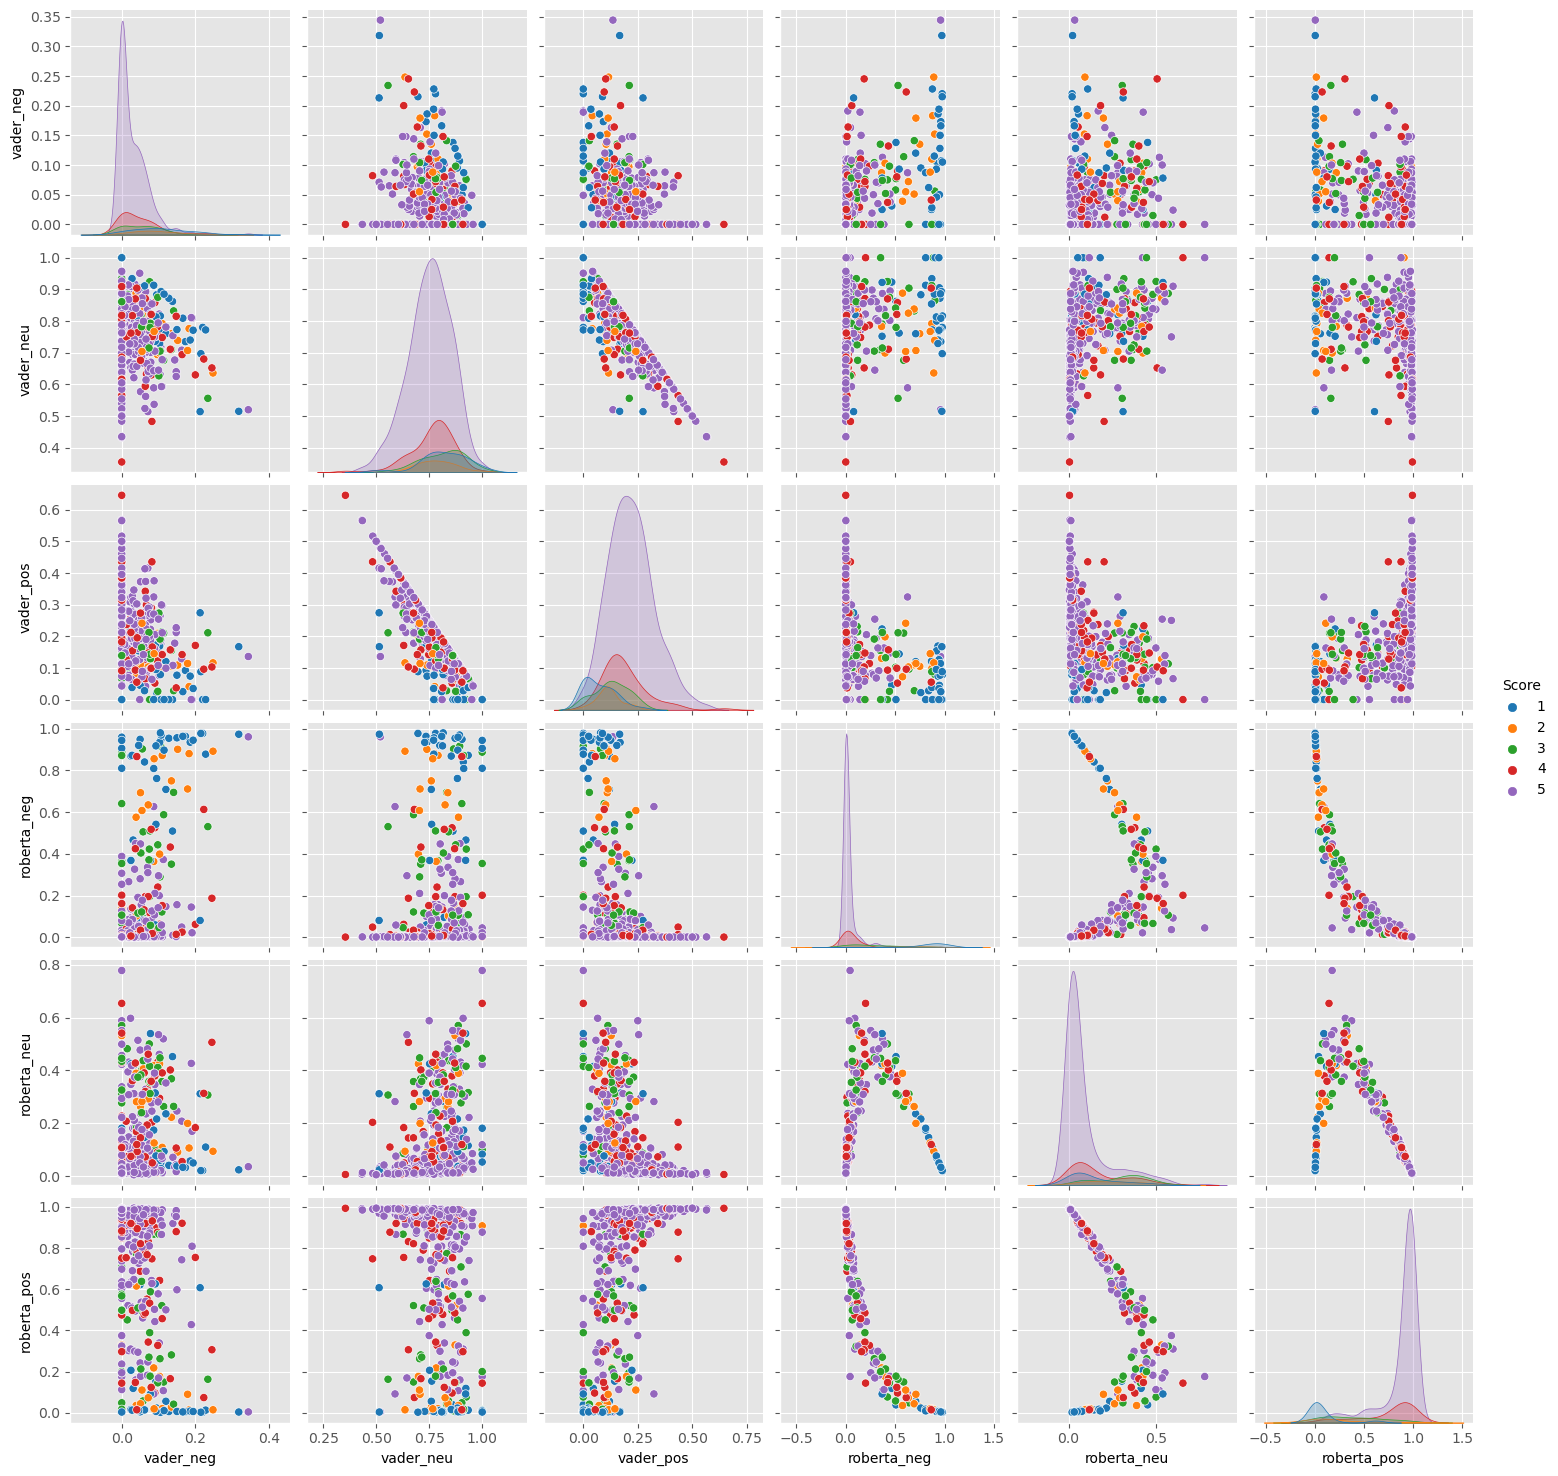

In [33]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

### Review Examples:
- Positive 1-Star and Negative 5-Star Reviews
- Lets look at some examples where the model scoring and review score differ the most

In [34]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [35]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [36]:
# nevative sentiment 5-Star view

In [37]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [38]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

### The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [39]:
# Importing the pipeline class from the transformers library
from transformers import pipeline

# Creating a sentiment analysis pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


- With this sentiment analysis pipeline, you can pass input texts to the sent_pipeline and get sentiment predictions for those texts. The pipeline will automatically handle the tokenization, model inference, and sentiment classification for you.

In [40]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [41]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [42]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

### The End